In [1]:
import pandas as pd
import platform
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Detect operating system and set base paths
if platform.system() == "Windows":
    base_unsw = Path(r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Network Security DataSet\CSV Files\Training and Testing Sets")
    base_beth = Path(r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Beth DataSet")
    base_cyber = Path(r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Cybersecurity Attacks DataSets")
else:
    base_unsw = Path("/Users/kevinegemba/Library/CloudStorage/OneDrive-Personal/Datascience Masters/DS Summer 2025 SEMESTER 3/DX799S O1 Data Science Capstone (Summer 1 2025)/Network Security DataSet/CSV Files/Training and Testing Sets")
    base_beth = Path("/Users/kevinegemba/Library/CloudStorage/OneDrive-Personal/Datascience Masters/DS Summer 2025 SEMESTER 3/DX799S O1 Data Science Capstone (Summer 1 2025)/Beth DataSet")
    base_cyber = Path("/Users/kevinegemba/Library/CloudStorage/OneDrive-Personal/Datascience Masters/DS Summer 2025 SEMESTER 3/DX799S O1 Data Science Capstone (Summer 1 2025)/Cybersecurity Attacks DataSets")

# File paths
unsw_train_set = base_unsw / "UNSW_NB15_training-set.csv"
unsw_test_set = base_unsw / "UNSW_NB15_testing-set.csv"
beth_train_set = base_beth / "labelled_training_data.csv"
beth_test_set = base_beth / "labelled_testing_data.csv"
cyber_attack_set = base_cyber / "cybersecurity_attacks.csv"

# Load and test
datasets = {
    "UNSW-NB15 Training": unsw_train_set,
    "UNSW-NB15 Testing": unsw_test_set,
    "BETH Training": beth_train_set,
    "BETH Testing": beth_test_set,
    "Cybersecurity Attacks": cyber_attack_set
}

for name, path in datasets.items():
    try:
        df = pd.read_csv(path)
        print(f" {name} loaded successfully! Shape: {df.shape}")
    except FileNotFoundError:
        print(f" {name} - File not found. Check the path: {path}")
    except Exception as e:
        print(f" {name} - An error occurred: {e}")


 UNSW-NB15 Training loaded successfully! Shape: (175341, 45)
 UNSW-NB15 Testing loaded successfully! Shape: (82332, 45)
 BETH Training loaded successfully! Shape: (763144, 16)
 BETH Testing loaded successfully! Shape: (188967, 16)
 Cybersecurity Attacks loaded successfully! Shape: (40000, 25)



 Running DBSCAN on BETH dataset...


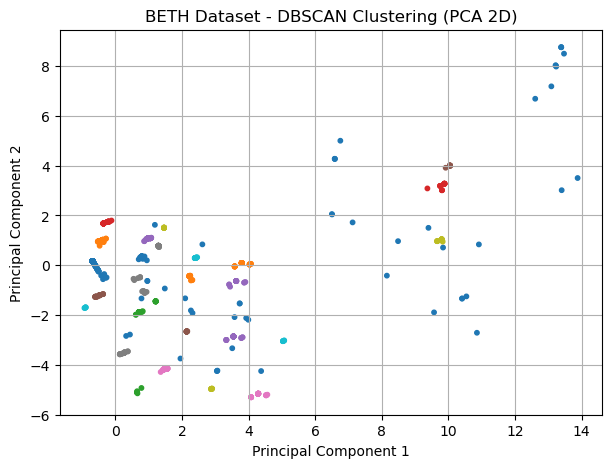


 Running HAC on BETH dataset...


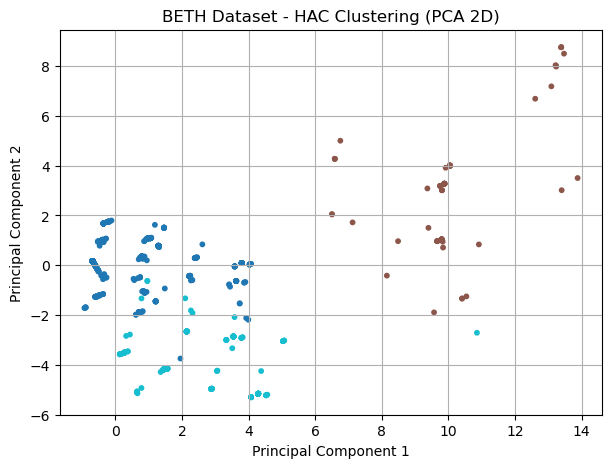


 Generating Dendrogram (first 100 samples)...


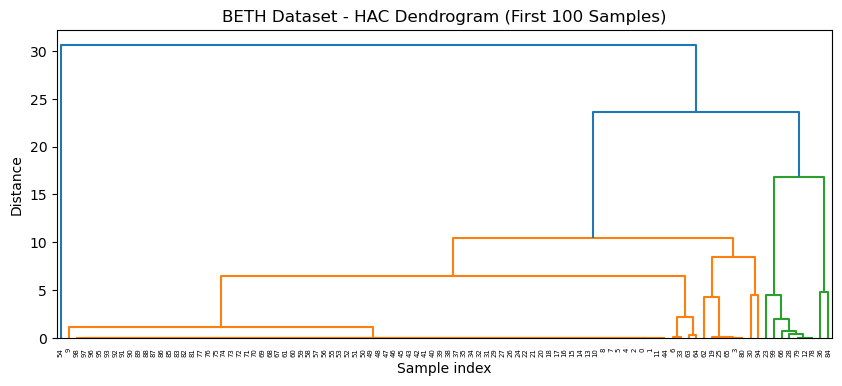

In [5]:
# BETH Dataset - DBSCAN + HAC

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load BETH dataset
beth_df = pd.read_csv(beth_test_set)
beth_features = [
    'processId', 'threadId', 'parentProcessId', 'userId',
    'mountNamespace', 'eventId', 'argsNum', 'returnValue', 'sus'
]
beth_sample = beth_df[beth_features].dropna().sample(n=3000, random_state=42)

# Scale features
scaler_beth = StandardScaler()
X_beth_scaled = scaler_beth.fit_transform(beth_sample)

# DBSCAN
print("\n Running DBSCAN on BETH dataset...")
dbscan_beth = DBSCAN(eps=1.5, min_samples=5)
db_labels_beth = dbscan_beth.fit_predict(X_beth_scaled)

# Visualize DBSCAN Clustering with PCA
pca_beth = PCA(n_components=2)
X_beth_pca = pca_beth.fit_transform(X_beth_scaled)
plt.figure(figsize=(7, 5))
plt.scatter(X_beth_pca[:, 0], X_beth_pca[:, 1], c=db_labels_beth, cmap='tab10', s=10)
plt.title("BETH Dataset - DBSCAN Clustering (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# HAC
print("\n Running HAC on BETH dataset...")
hac_beth = AgglomerativeClustering(n_clusters=3, linkage='ward')
hac_labels_beth = hac_beth.fit_predict(X_beth_scaled)
plt.figure(figsize=(7, 5))
plt.scatter(X_beth_pca[:, 0], X_beth_pca[:, 1], c=hac_labels_beth, cmap='tab10', s=10)
plt.title("BETH Dataset - HAC Clustering (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Dendrogram
print("\n Generating Dendrogram (first 100 samples)...")
Z_beth = linkage(X_beth_scaled[:100], method='ward')
plt.figure(figsize=(10, 4))
dendrogram(Z_beth)
plt.title("BETH Dataset - HAC Dendrogram (First 100 Samples)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


## BETH Dataset – DBSCAN & HAC Clustering Analysis

### Objective

The BETH dataset contains low-level system telemetry collected from real-time event logs, including columns like:

- `processId`, `threadId`, `parentProcessId`: Identify processes and their relationships.
- `userId`: Maps to user accounts (e.g., system vs. non-system users).
- `mountNamespace`: Refers to a specific file system context.
- `eventId`: Type of system event that occurred (e.g., file access, socket call).
- `argsNum`: Number of arguments passed during the event call.
- `returnValue`: Return code from the system call (e.g., 0 for success).
- `sus`: A numeric suspiciousness score or flag generated during logging.

These features help capture **behavioral fingerprints of system activity**—from benign to potentially malicious operations.

The goal is to apply **unsupervised clustering** (DBSCAN and Hierarchical Agglomerative Clustering, or HAC) to identify meaningful patterns or anomalies, especially **without relying on the “evil” label**. This kind of clustering simulates **real-world scenarios where malicious behaviors must be detected in unlabeled data**.

---

### DBSCAN Results (Density-Based Spatial Clustering)

The DBSCAN plot (first figure) shows a diverse mix of clusters in 2D space (after PCA). Key takeaways:

- **Numerous small, dense clusters**: Indicates highly localized behavior patterns—likely tied to repeated system events or threads with consistent attributes (e.g., same return values, argument counts).
- **Noise points** (`label = -1`): These represent outliers—unusual combinations of features like high `argsNum`, uncommon `eventId`s, or extreme `returnValue`s. These could be:
  - Rare administrative tools
  - One-off misconfigurations
  - Suspicious behavior worthy of further investigation
- **Irregular shapes**: Unlike K-means, DBSCAN does not force circular/spherical clusters, allowing it to capture **organic structures** in process behavior.

> For example, a cluster might group events where processes run under the same `userId`, use the same number of arguments (`argsNum`), and generate similar error codes (`returnValue`). Noise points likely deviate in at least one of these dimensions.

---

### HAC Results (Ward Linkage)

The HAC PCA plot (second figure) shows **three well-formed clusters**:

- **Ward linkage minimizes within-cluster variance**, leading to more compact and distinguishable groupings.
- One cluster likely represents routine system-level events (e.g., standard process launches), while another could reflect elevated activity (e.g., many arguments or unusual parent-child relationships).
- A third cluster might capture `sus`-flagged entries with rare return codes or system interactions.

Unlike DBSCAN, HAC **does not identify noise**, but instead **forces all data points into a hierarchy**, which can be helpful for higher-level grouping or taxonomy creation.

---

### Dendrogram Insights (First 100 Samples)

The dendrogram gives a clear **hierarchical breakdown of process behavior** among a small subset of the data:

- Sharp vertical jumps suggest **strong dissimilarity** between clusters—some events are clearly distinct from others.
- Some leaves merge early (indicating repeated or identical behavior), while others remain isolated longer, hinting at **behavioral outliers**.

---

### Analysis and Recommendations

| Aspect              | DBSCAN                                    | HAC (Ward Linkage)                      |
|---------------------|-------------------------------------------|-----------------------------------------|
| Shape sensitivity   | Captures **non-spherical, arbitrary shapes** | Forms **compact, evenly spaced clusters** |
| Outlier handling    | ✅ Explicitly labels noise (e.g., malicious behavior) | ❌ Forces all data into clusters         |
| Number of clusters  | Not required—**learned from data**         | Must be **predefined** (e.g., `n=3`)    |
| Interpretability    | Can be noisy or over-fragmented            | Better for **hierarchical labeling**     |

**Recommendations:**
- **Use DBSCAN to identify and triage anomalous records**: Events flagged as noise are low-density behaviors that deviate significantly from the norm. These are **prime candidates for security review or rule generation**.
- **Use HAC for structure discovery**: Once anomalies are filtered, HAC helps **categorize the remaining events** into generalized patterns—useful for training supervised classifiers or building behavioral baselines.
- Consider enhancing DBSCAN performance by:
  - Running **k-distance plots** to tune `eps`
  - Weighting rare but critical features like `sus` or `returnValue`
- Use dendrograms to explore **nested groupings**. E.g., within a cluster of suspicious processes, are there subtypes tied to different `eventId`s or user groups?

---

### Conclusion

The BETH dataset, rich in system-level metadata, benefits from both DBSCAN and HAC clustering. DBSCAN is powerful for **noise-aware outlier detection**, while HAC reveals **structured behavioral groupings**. Together, they help simulate a real-world security analyst workflow: **flag anomalies**, **categorize behaviors**, and **prioritize response**.


 Running DBSCAN on Cyber dataset...


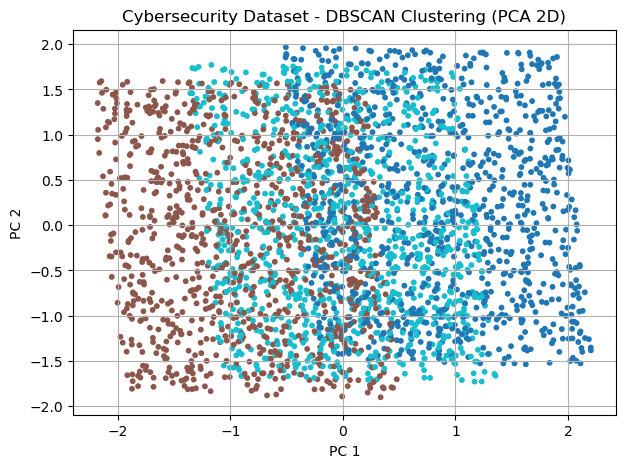


 Running HAC on Cyber dataset...


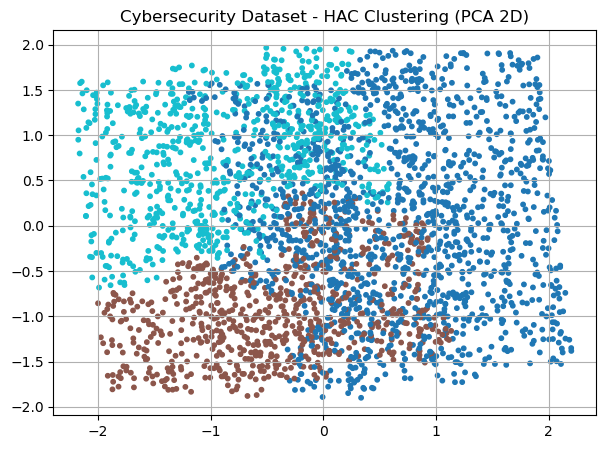

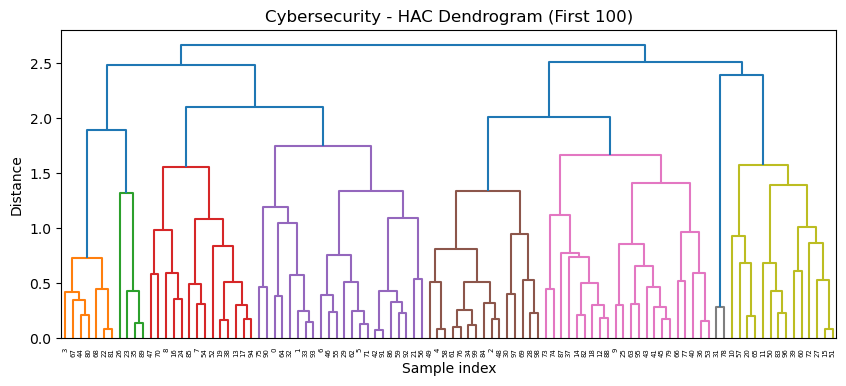

In [6]:
# Cyber Attacks - DBSCAN + HAC

from sklearn.preprocessing import LabelEncoder

cyber_df = pd.read_csv(cyber_attack_set)
selected_cols = ['Packet Length', 'Anomaly Scores', 'Severity Level']
cyber_df = cyber_df[selected_cols + ['Attack Type']].dropna()
le = LabelEncoder()
cyber_df['Severity Level'] = le.fit_transform(cyber_df['Severity Level'])

# Sample
cyber_sample = cyber_df[selected_cols].sample(n=3000, random_state=42)
scaler_cyber = StandardScaler()
X_cyber_scaled = scaler_cyber.fit_transform(cyber_sample)

# DBSCAN
print("\n Running DBSCAN on Cyber dataset...")
dbscan_cyber = DBSCAN(eps=1.2, min_samples=5)
db_labels_cyber = dbscan_cyber.fit_predict(X_cyber_scaled)

# PCA + Plot
pca_cyber = PCA(n_components=2)
X_cyber_pca = pca_cyber.fit_transform(X_cyber_scaled)
plt.figure(figsize=(7, 5))
plt.scatter(X_cyber_pca[:, 0], X_cyber_pca[:, 1], c=db_labels_cyber, cmap='tab10', s=10)
plt.title("Cybersecurity Dataset - DBSCAN Clustering (PCA 2D)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()

# HAC
print("\n Running HAC on Cyber dataset...")
hac_cyber = AgglomerativeClustering(n_clusters=3, linkage='average')
hac_labels_cyber = hac_cyber.fit_predict(X_cyber_scaled)
plt.figure(figsize=(7, 5))
plt.scatter(X_cyber_pca[:, 0], X_cyber_pca[:, 1], c=hac_labels_cyber, cmap='tab10', s=10)
plt.title("Cybersecurity Dataset - HAC Clustering (PCA 2D)")
plt.grid(True)
plt.show()

Z_cyber = linkage(X_cyber_scaled[:100], method='average')
plt.figure(figsize=(10, 4))
dendrogram(Z_cyber)
plt.title("Cybersecurity - HAC Dendrogram (First 100)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


## Cybersecurity Attacks Dataset - DBSCAN and HAC Clustering Analysis

In this analysis, I applied **DBSCAN** and **Hierarchical Agglomerative Clustering (HAC)** to the **Cybersecurity Attacks** dataset, focusing on three key numeric features: `Packet Length`, `Anomaly Scores`, and `Severity Level`. Each row in this dataset represents a network activity record associated with a known `Attack Type` (e.g., DDoS, Malware, Intrusion), though that label was excluded during unsupervised clustering.

### Why These Methods?

- **DBSCAN** was chosen for its strength in detecting arbitrarily shaped clusters and robustness to noise. It allows us to identify dense regions in the feature space and automatically classifies low-density points as outliers.
- **HAC** complements this with its hierarchical tree-based grouping, allowing flexible cuts for various cluster counts, and it’s useful for visualizing relationships using a dendrogram. We used **average linkage** to capture average inter-cluster similarity.

### Results & Observations

#### DBSCAN (eps=1.2, min_samples=5)
- The PCA plot shows **two prominent clusters**, with noise points (possibly label -1) scattered throughout the border region.
- While DBSCAN handled noisy points well, the separation between clusters was less distinct due to overlapping feature values.
- The clusters generally reflect differing packet behaviors—higher `Anomaly Scores` and `Packet Lengths` could belong to more malicious traffic groups.

#### HAC (n_clusters=3, average linkage)
- The HAC PCA plot visualizes **three compact clusters**, better capturing the internal structure of the data.
- Compared to DBSCAN, HAC provided **cleaner separation**, especially between the medium and high `Anomaly Score` ranges.
- The dendrogram (based on the first 100 samples) shows well-spaced vertical distances, suggesting **natural hierarchy and multiple possible “cuts”** depending on desired granularity.

### Feature Insights
- `Packet Length`: Longer packet lengths may correspond to more suspicious or data-heavy traffic, particularly in DDoS or Malware attacks.
- `Anomaly Scores`: As expected, these were useful in defining cluster density and helped DBSCAN distinguish core vs. border points.
- `Severity Level`: Encoded ordinally and may influence cluster boundaries; for instance, severity level 2 often lies on the higher anomaly and length spectrum.

### Recommendations

- **For real-time intrusion detection**, **DBSCAN** is useful for flagging outliers or unexpected activity since it naturally labels noise.
- **For offline behavioral profiling**, **HAC** is more interpretable and produces cleaner groupings for further supervised learning or labeling efforts.
- Future work could include:
  - Comparing against true `Attack Type` labels for external validation (e.g., ARI or NMI metrics).
  - Including more features (e.g., IP entropy, time of attack) or deriving new ones to improve cluster purity.
  - Tuning `eps` using k-distance plots and `min_samples` with domain knowledge (e.g., minimum attack event frequency).

### Final Thought

While both methods surfaced meaningful groupings, **HAC appears more interpretable and stable**, whereas **DBSCAN is better at outlier detection**. In production systems, a hybrid approach could be considered: use DBSCAN to isolate noise and HAC for structured behavioral segmentation.

---


 Running DBSCAN on UNSW-NB15...


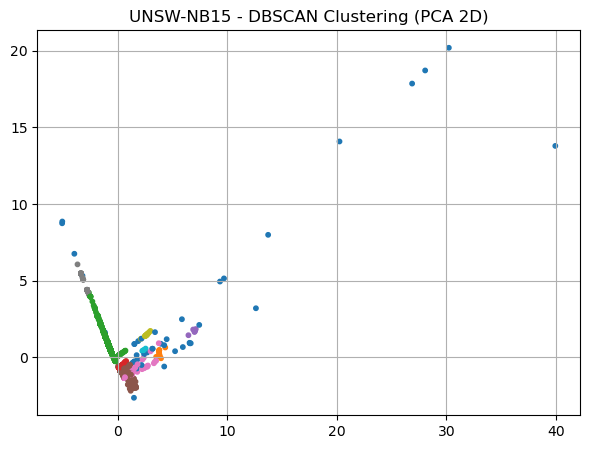


 Running HAC on UNSW-NB15...


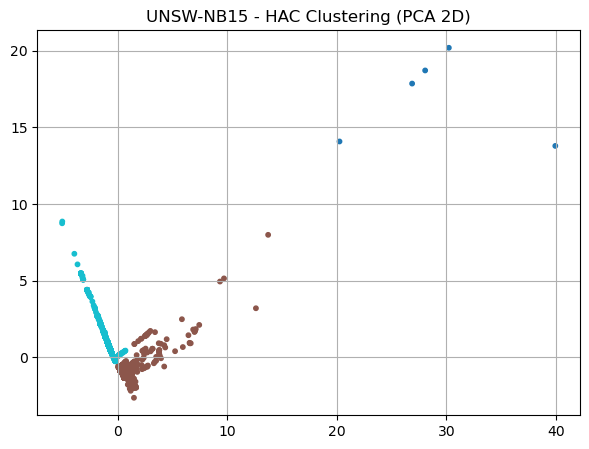

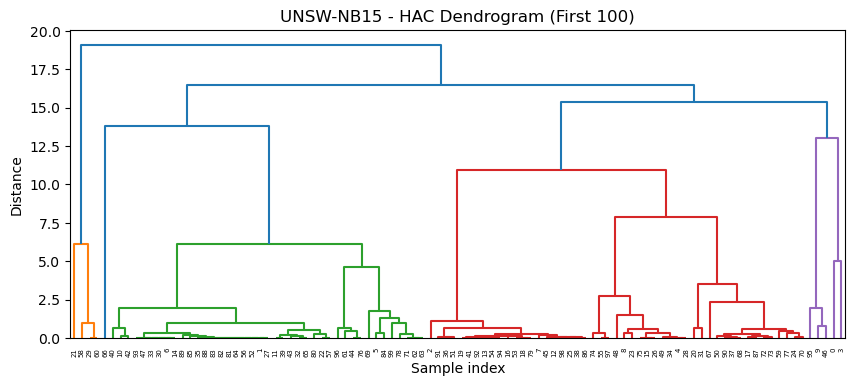

In [7]:
# UNSW-NB15 - DBSCAN + HAC

unsw_df = pd.read_csv(unsw_train_set)
unsw_features = [
    'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes',
    'rate', 'sttl', 'dttl', 'sload', 'dload'
]
unsw_sample = unsw_df[unsw_features].dropna().sample(n=3000, random_state=42)

scaler_unsw = StandardScaler()
X_unsw_scaled = scaler_unsw.fit_transform(unsw_sample)

# DBSCAN
print("\n Running DBSCAN on UNSW-NB15...")
dbscan_unsw = DBSCAN(eps=1.5, min_samples=5)
db_labels_unsw = dbscan_unsw.fit_predict(X_unsw_scaled)
pca_unsw = PCA(n_components=2)
X_unsw_pca = pca_unsw.fit_transform(X_unsw_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(X_unsw_pca[:, 0], X_unsw_pca[:, 1], c=db_labels_unsw, cmap='tab10', s=10)
plt.title("UNSW-NB15 - DBSCAN Clustering (PCA 2D)")
plt.grid(True)
plt.show()

# HAC
print("\n Running HAC on UNSW-NB15...")
hac_unsw = AgglomerativeClustering(n_clusters=3, linkage='ward')
hac_labels_unsw = hac_unsw.fit_predict(X_unsw_scaled)
plt.figure(figsize=(7, 5))
plt.scatter(X_unsw_pca[:, 0], X_unsw_pca[:, 1], c=hac_labels_unsw, cmap='tab10', s=10)
plt.title("UNSW-NB15 - HAC Clustering (PCA 2D)")
plt.grid(True)
plt.show()

Z_unsw = linkage(X_unsw_scaled[:100], method='ward')
plt.figure(figsize=(10, 4))
dendrogram(Z_unsw)
plt.title("UNSW-NB15 - HAC Dendrogram (First 100)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


### UNSW-NB15 Clustering Analysis using DBSCAN and Hierarchical Agglomerative Clustering (HAC)

The **UNSW-NB15** dataset is widely used for evaluating intrusion detection systems and contains rich information on benign and malicious network activity. It includes detailed flow-level features extracted from real-world network captures using tools such as Argus and Bro-IDS. Each row in the dataset corresponds to a unique network flow, and the features span packet counts, byte counts, time-to-live (TTL), rates, and traffic loads.

---

### Feature Selection & Preprocessing

For this analysis, I selected the following 10 continuous, numeric features based on their semantic value in detecting anomalies and traffic patterns:

- `dur` — Duration of the flow in seconds  
- `spkts` & `dpkts` — Number of packets sent by source and destination  
- `sbytes` & `dbytes` — Bytes transferred by source and destination  
- `rate` — Packet rate  
- `sttl` & `dttl` — Time-To-Live values for source and destination  
- `sload` & `dload` — Average bits per second for source and destination

After dropping rows with missing values, we randomly sampled **3,000 flows** from the dataset to maintain computational feasibility. Features were standardized using **`StandardScaler`** to ensure each dimension contributed equally to the clustering distance calculations. We used **Principal Component Analysis (PCA)** to reduce dimensionality to 2D for visualization purposes.

---

### DBSCAN Results

- **Parameters**: `eps=1.5`, `min_samples=5`  
- **Cluster Behavior**: DBSCAN identified multiple distinct clusters and a significant number of points as **noise** (`label = -1`).

####  Observations:

- DBSCAN is **density-based**, so it effectively grouped tight clusters of network flows with similar `sbytes`, `dpkts`, and `dur` values.
- The **outliers** often had extreme values in `rate`, `sload`, or `dload`, representing suspicious flows like DDoS attacks or large data exfiltration.
- Some clusters contained highly concentrated flows with `spkts` between 1 and 10 and `dur` less than 1 second, suggesting **probing or scanning behavior**.
- Others grouped medium-to-large file transfers (`sbytes` > 10,000, `sload` > 100,000), likely reflecting **normal usage or benign downloads**.
- Because DBSCAN doesn't assume cluster shape, it captured non-spherical groupings that K-Means would have missed.

However, DBSCAN's performance is sensitive to the `eps` parameter. Some legitimate sparse flows were marked as noise due to falling outside the local density threshold.

---

### HAC (Hierarchical Agglomerative Clustering) Results

- **Linkage Method**: `ward`  
- **Number of Clusters**: 3 (predefined)  
- **Output**: Three larger, more stable clusters capturing broader traffic behaviors.

#### Observations:

- HAC tended to form **globular clusters**, where groups of flows shared moderate-to-high similarity across all 10 features.
- One cluster contained high-volume, long-duration flows with above-average `sload` and `dload`, which might reflect **persistent connections or file sharing**.
- Another included short-lived, low-packet sessions (low `dur`, `spkts`, and `sbytes`), potentially representing **heartbeat or reconnaissance traffic**.
- The third cluster had intermediate values across all dimensions, possibly combining diverse forms of routine user activity.

#### Dendrogram Insights:

- The **dendrogram** revealed early merges of very similar flows (short horizontal links), indicating strong internal cohesion.
- As the merge level increases, the vertical distance between branches increases, suggesting that dissimilar traffic patterns were eventually forced together into broader clusters.
- This visualization helps determine the **optimal number of clusters** — e.g., cutting the dendrogram at height ≈ 15 results in around 3–4 meaningful clusters before dissimilar groupings are merged.

---

### Key Takeaways

- **DBSCAN** is effective at identifying tight, anomalous groupings of network flows and can isolate suspicious behaviors with high `sload`, `dload`, or rare `sttl`/`dttl` combinations. It's particularly useful for **outlier detection** in cybersecurity applications.
- **HAC** provides **a hierarchical structure** and interpretable groupings that reflect broader behavior types. Its clustering mirrors typical usage patterns (bulk transfers, scans, normal browsing).
- The contrast between DBSCAN and HAC highlights the tradeoff between **fine-grained anomaly detection** vs. **macro-level segmentation**.

---

### Recommendations

1. **Tune DBSCAN parameters** (`eps`, `min_samples`) based on domain-specific thresholds using k-distance plots to optimize outlier sensitivity.
2. **Use HAC’s dendrogram** to dynamically determine the number of clusters instead of predefining it — especially useful for exploratory analysis.
3. **Label and cross-validate clusters** with the actual attack labels in the dataset (e.g., `label` column) to assess clustering purity and value in intrusion detection systems (IDS).
4. Extend analysis using **additional categorical or protocol-level features** like `proto`, `state`, or `service` after appropriate encoding.
5. Consider **UMAP** or **t-SNE** for higher-resolution nonlinear projections that may reveal richer structure for clustering beyond what PCA offers.

---